Rami, Nicola Srour (2025)

Title: Data analysis, Product performance dataset

In [ ]:
# import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataset
df = pd.read_csv("ecommerce_product_performance.csv")
df.head(3)

,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
0,199.671415,0.177024,4.411071,62.0,1.0,9.0,0.185116,5.0
1,136.173570,0.041467,3.033534,201.0,1.0,3.0,0.384639,10.0
2,214.768854,0.276197,2.866881,479.0,1.0,19.0,0.056410,4.0


In [ ]:
df.shape

(2000, 8)

In [ ]:
# describe statistics for dataset
df.describe()

,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,156.774274,0.286993,3.729987,304.318421,0.903158,15.411579,0.328904,5.572105
std,93.484558,0.159012,0.885164,310.344539,0.295821,8.534049,0.176306,2.827601
min,5.000000,0.005368,1.000000,0.000000,0.000000,1.000000,0.006528,1.000000
25%,87.414867,0.165603,3.125828,86.750000,1.000000,8.000000,0.190178,3.000000
50%,153.663352,0.265994,3.770215,210.000000,1.000000,15.000000,0.307430,6.000000
75%,217.788796,0.391186,4.417711,429.000000,1.000000,22.000000,0.444752,8.000000
max,535.273149,0.800000,5.000000,2848.000000,1.000000,30.000000,0.900000,10.000000


<Axes: xlabel='Category_ID', ylabel='count'>

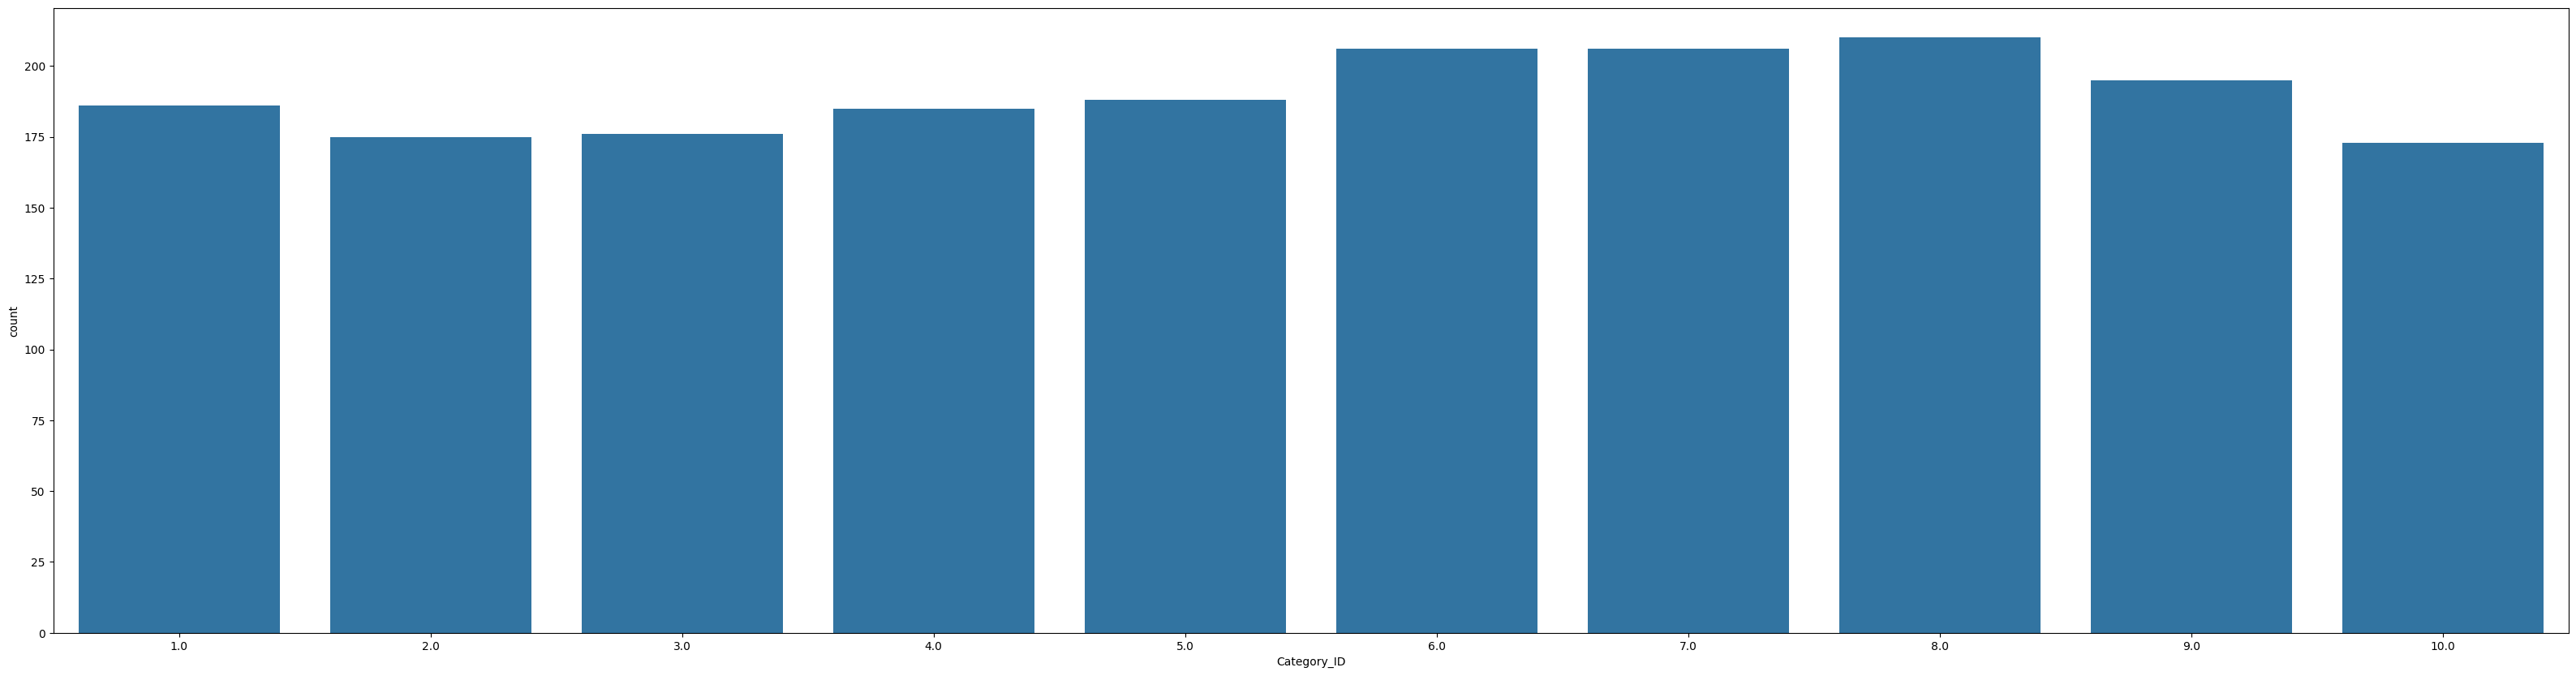

In [ ]:
# check usefullness
# frequncey of products
plt.figure(figsize=(40,10))
products = sns.countplot(x='Category_ID', data=df)
products

In [ ]:
# check usefulness
# how many unique cateogries for products
un = df['Category_ID'].nunique()
un

10

In [ ]:
# check accruacy
# how many values between a needed range
low = 100
high = 200
fdf = df[df['Product_Price'].between(low, high)]
fdf.shape

(736, 8)

In [ ]:
# check accruacy
# show limit values for lower and upper outliers
q1 = df['Return_Rate'].quantile(0.25)
q3 = df['Return_Rate'].quantile(0.75)
IQR = q3 - q1
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR
print(lower, upper)

-0.1916828475352365 0.8266135192723532


In [ ]:
# percentage of outliers
lowout =df[df['Return_Rate'] < lower]
highout =df[df['Return_Rate'] < upper]
total = len(df)
perlow = (len(lowout) / total)* 100
perup = (len(highout) / total)* 100
print(f"{perlow:.2f}%")
print(f"{perup:.2f}%")

0.00%
94.70%


In [ ]:
# check validity
# making sure that values in a column are integer by seeing the count of integer values
import numpy as np
non_int_mask = df['Product_Rating'].apply(lambda x: not isinstance(x, (int, np.integer)) or pd.isna(x))
non_int_val = df[non_int_mask]
non_int_val.shape

(2000, 8)

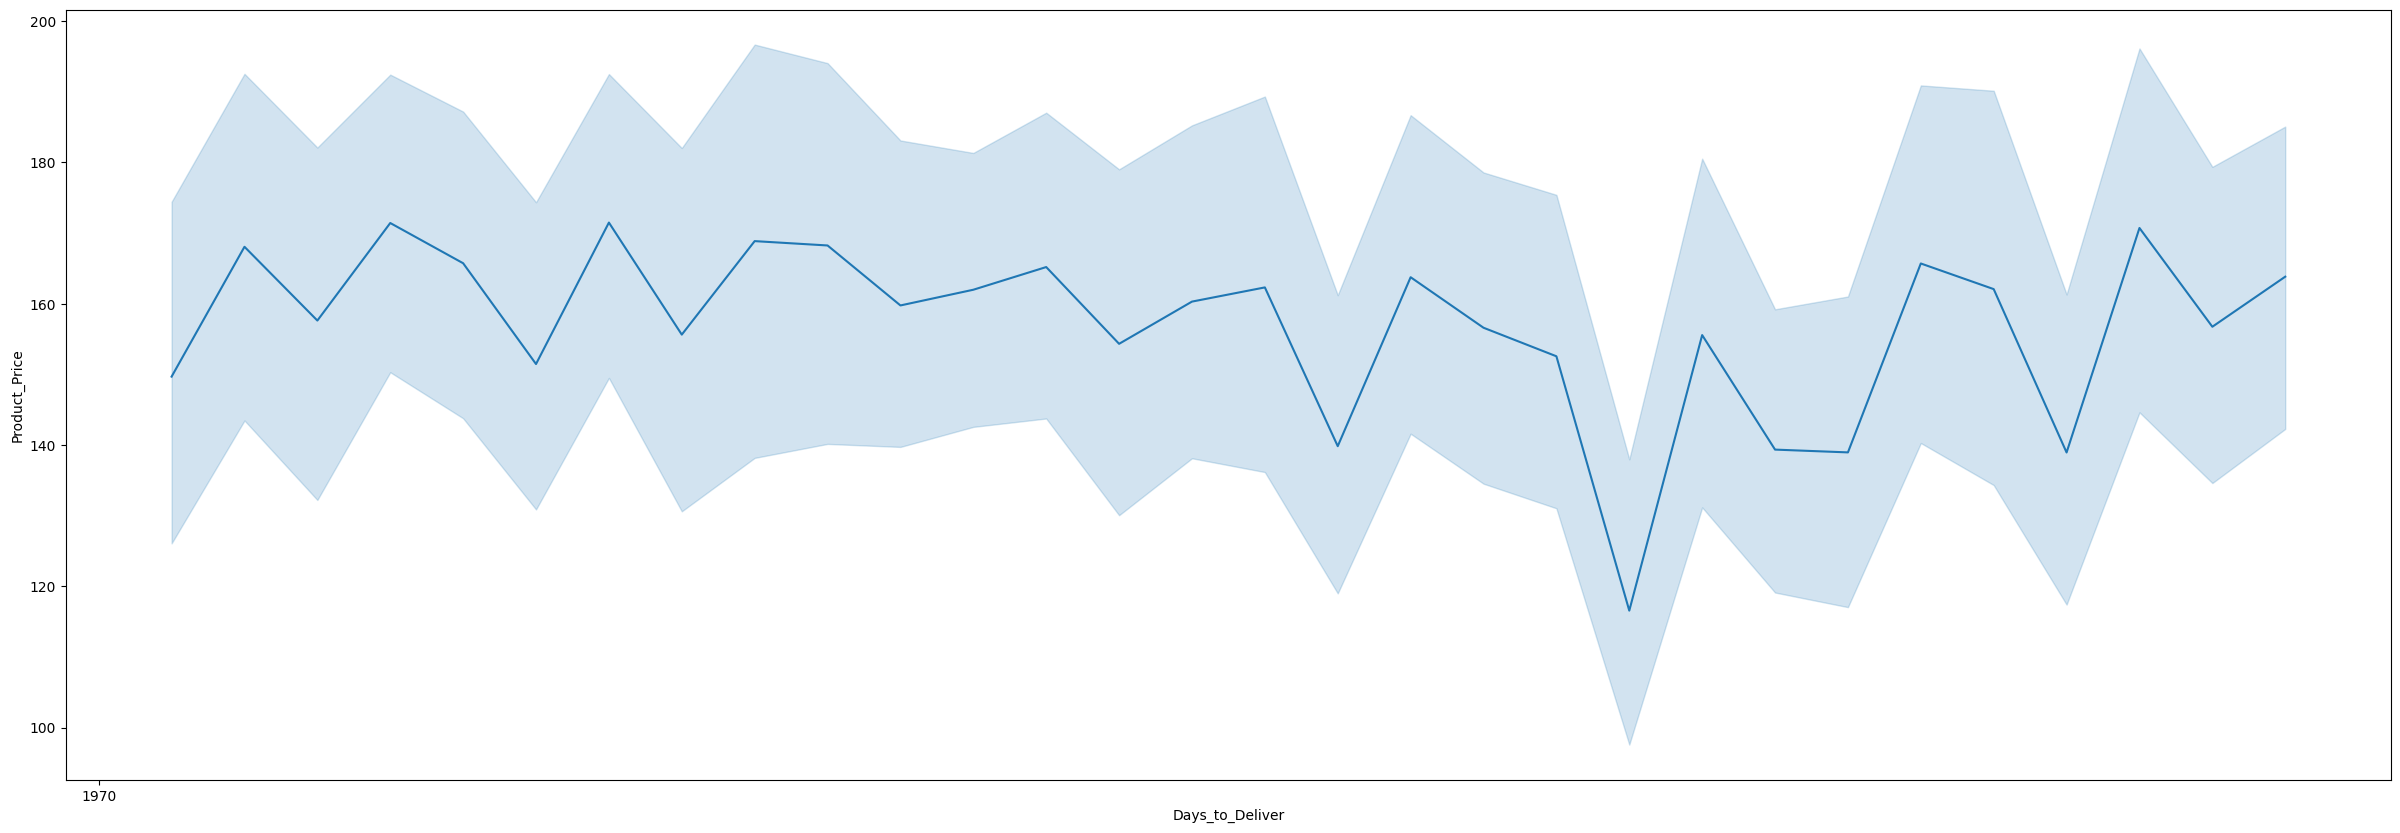

In [ ]:
# check validity
# see sales per date, to figure out trends
plt.figure(figsize=(30,10))
df['Days_to_Deliver'] = pd.to_datetime(df['Days_to_Deliver'])
sns.lineplot(x='Days_to_Deliver', y='Product_Price', data=df)
plt.show()

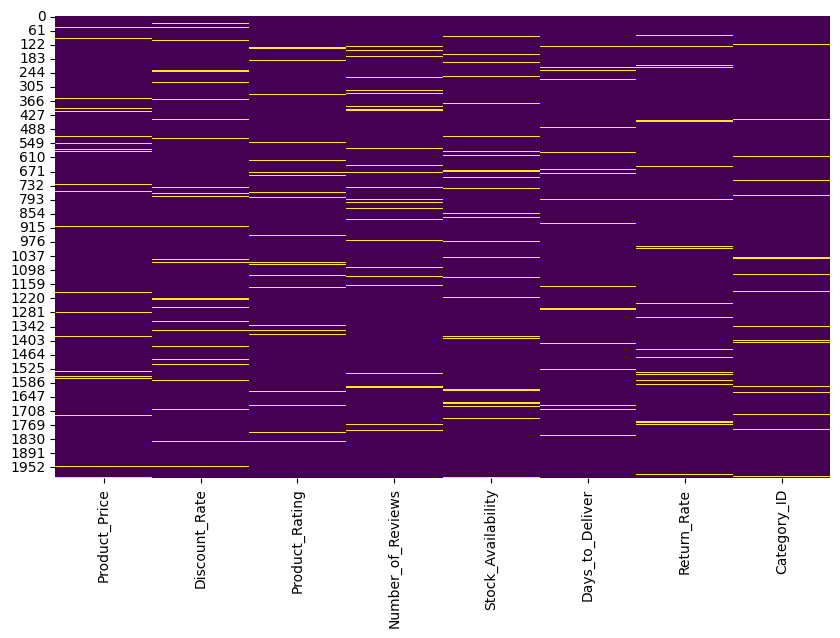

In [ ]:
# check Completness
# use heatmap to check null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
# check relevance
# looking for certain needed values
valid_values = [0.2,0.4, 0.34]
sd = df[df['Discount_Rate'].isin(valid_values)]
sd.shape

(0, 8)

In [ ]:
# check usability
# checking if a colunm have numeric value
pd.api.types.is_numeric_dtype(df['Return_Rate'])

True

In [ ]:
# check usability
# types of columns
df.dtypes.value_counts()

,count
float64,7
datetime64[ns],1


In [ ]:
# check usability
# looking through a dataset to look for null values and adding color red
df.style.highlight_null(color='red')

,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
0,199.671415,0.177024,4.411071,62.000000,1.000000,1970-01-01 00:00:00.000000009,0.185116,5.000000
1,136.173570,0.041467,3.033534,201.000000,1.000000,1970-01-01 00:00:00.000000003,0.384639,10.000000
2,214.768854,0.276197,2.866881,479.000000,1.000000,1970-01-01 00:00:00.000000019,0.056410,4.000000
3,302.302986,0.094254,4.473473,252.000000,1.000000,1970-01-01 00:00:00.000000011,nan,7.000000
4,126.584663,0.411845,3.553082,671.000000,1.000000,1970-01-01 00:00:00.000000014,0.672163,6.000000
5,126.586304,0.515701,1.874022,303.000000,nan,1970-01-01 00:00:00.000000002,0.114370,7.000000
6,307.921282,0.634228,nan,350.000000,1.000000,1970-01-01 00:00:00.000000007,0.172875,6.000000
7,226.743473,0.271702,3.366010,330.000000,1.000000,1970-01-01 00:00:00.000000010,0.091893,2.000000
8,103.052561,0.161156,5.000000,179.000000,1.000000,1970-01-01 00:00:00.000000010,0.533085,7.000000
9,204.256004,0.301962,5.000000,350.000000,1.000000,1970-01-01 00:00:00.000000020,0.480863,8.000000


In [ ]:
# check Credibitlty

# looking if genders are all male and female
MA_FE = ['Male', 'female']
pick_thecells = df['Stock_Availability'].isin(MA_FE)
the_count = (pick_thecells == True).sum()
the_count

np.int64(0)

<Axes: xlabel='Discount_Rate'>

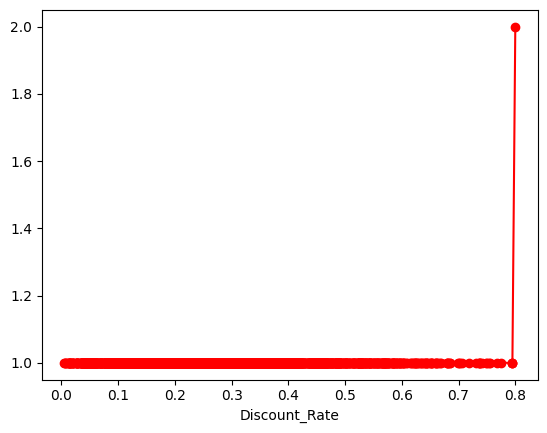

In [ ]:
# check Credibitlty

# looking for anomalies using visualization
coun = df['Discount_Rate'].value_counts().sort_index()
coun.plot(kind='line', color='red', marker='o')

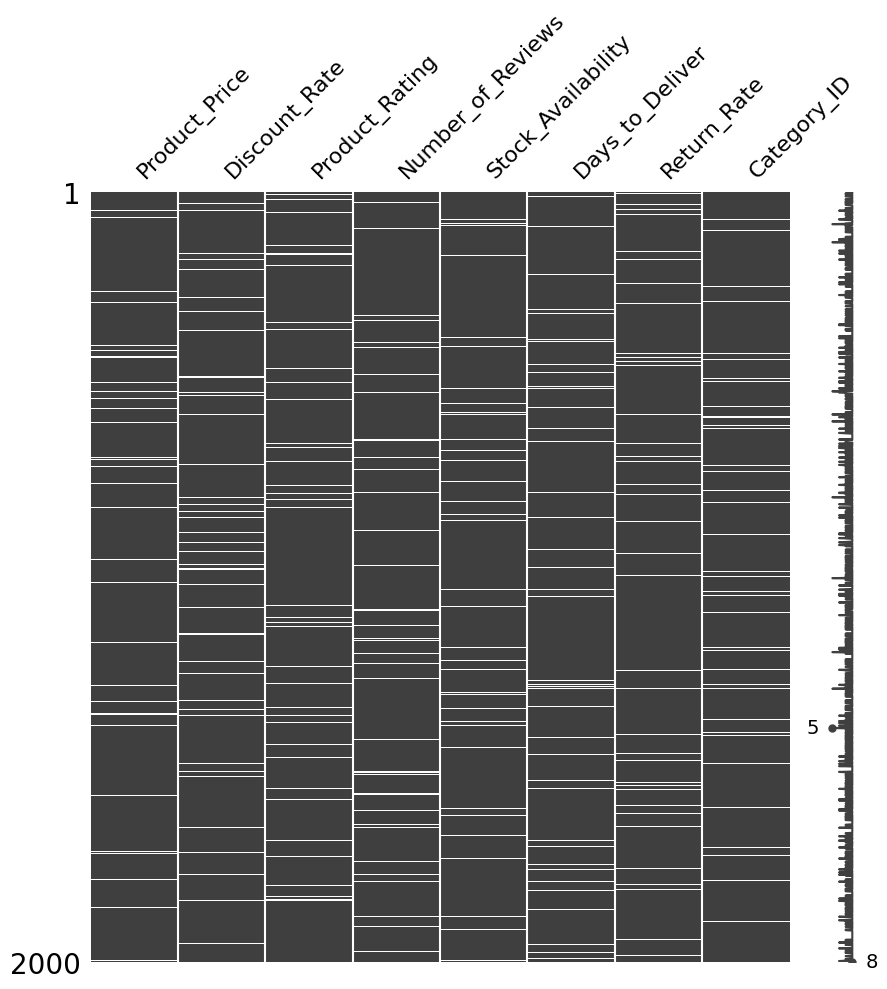

In [ ]:
# check appropriatness
# using missingno to look for null values
import missingno as msno
msno.matrix(df, figsize=(10, 10))
plt.show()

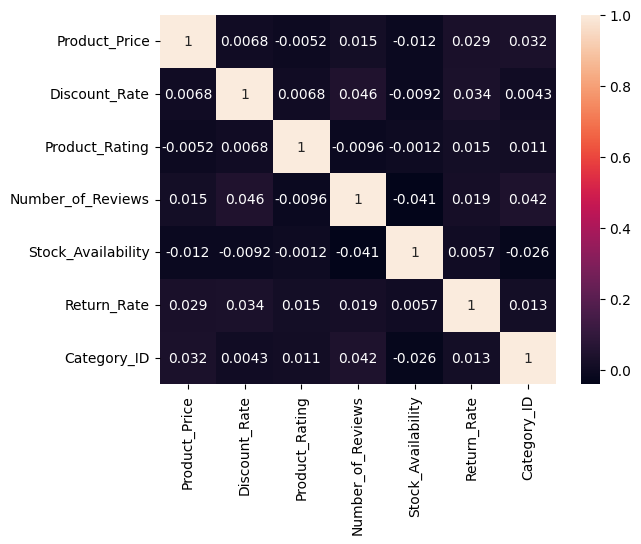

In [ ]:
# check appropriatness
# show correlation matrix to get relation between columns
corrmatrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

In [ ]:
# removing nulls and duplicates to start proper analysis

# remove duplicates
df = df.drop_duplicates()
# remove nulls
df = df.dropna()
df.head(3)

,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
0,199.671415,0.177024,4.411071,62.0,1.0,1970-01-01 00:00:00.000000009,0.185116,5.0
1,136.173570,0.041467,3.033534,201.0,1.0,1970-01-01 00:00:00.000000003,0.384639,10.0
2,214.768854,0.276197,2.866881,479.0,1.0,1970-01-01 00:00:00.000000019,0.056410,4.0


In [ ]:
df.shape

(1314, 8)

# 1) Percentage of each category from the total

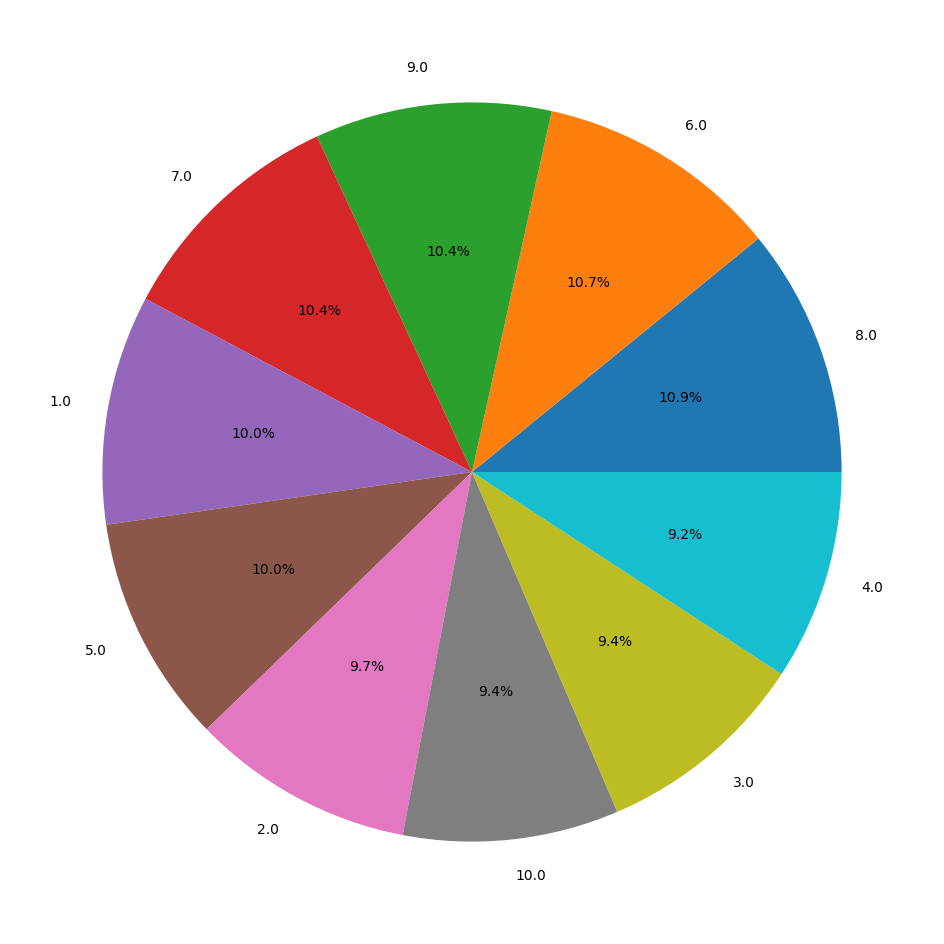

In [ ]:
a = df['Category_ID'].value_counts()*100
plt.figure(figsize=(12,12))
plt.pie(a, labels=a.index, autopct='%1.1f%%')
plt.show()

# 2) Frequency of each device type by month

<Axes: xlabel='Monthyear'>

<Figure size 4000x2000 with 0 Axes>

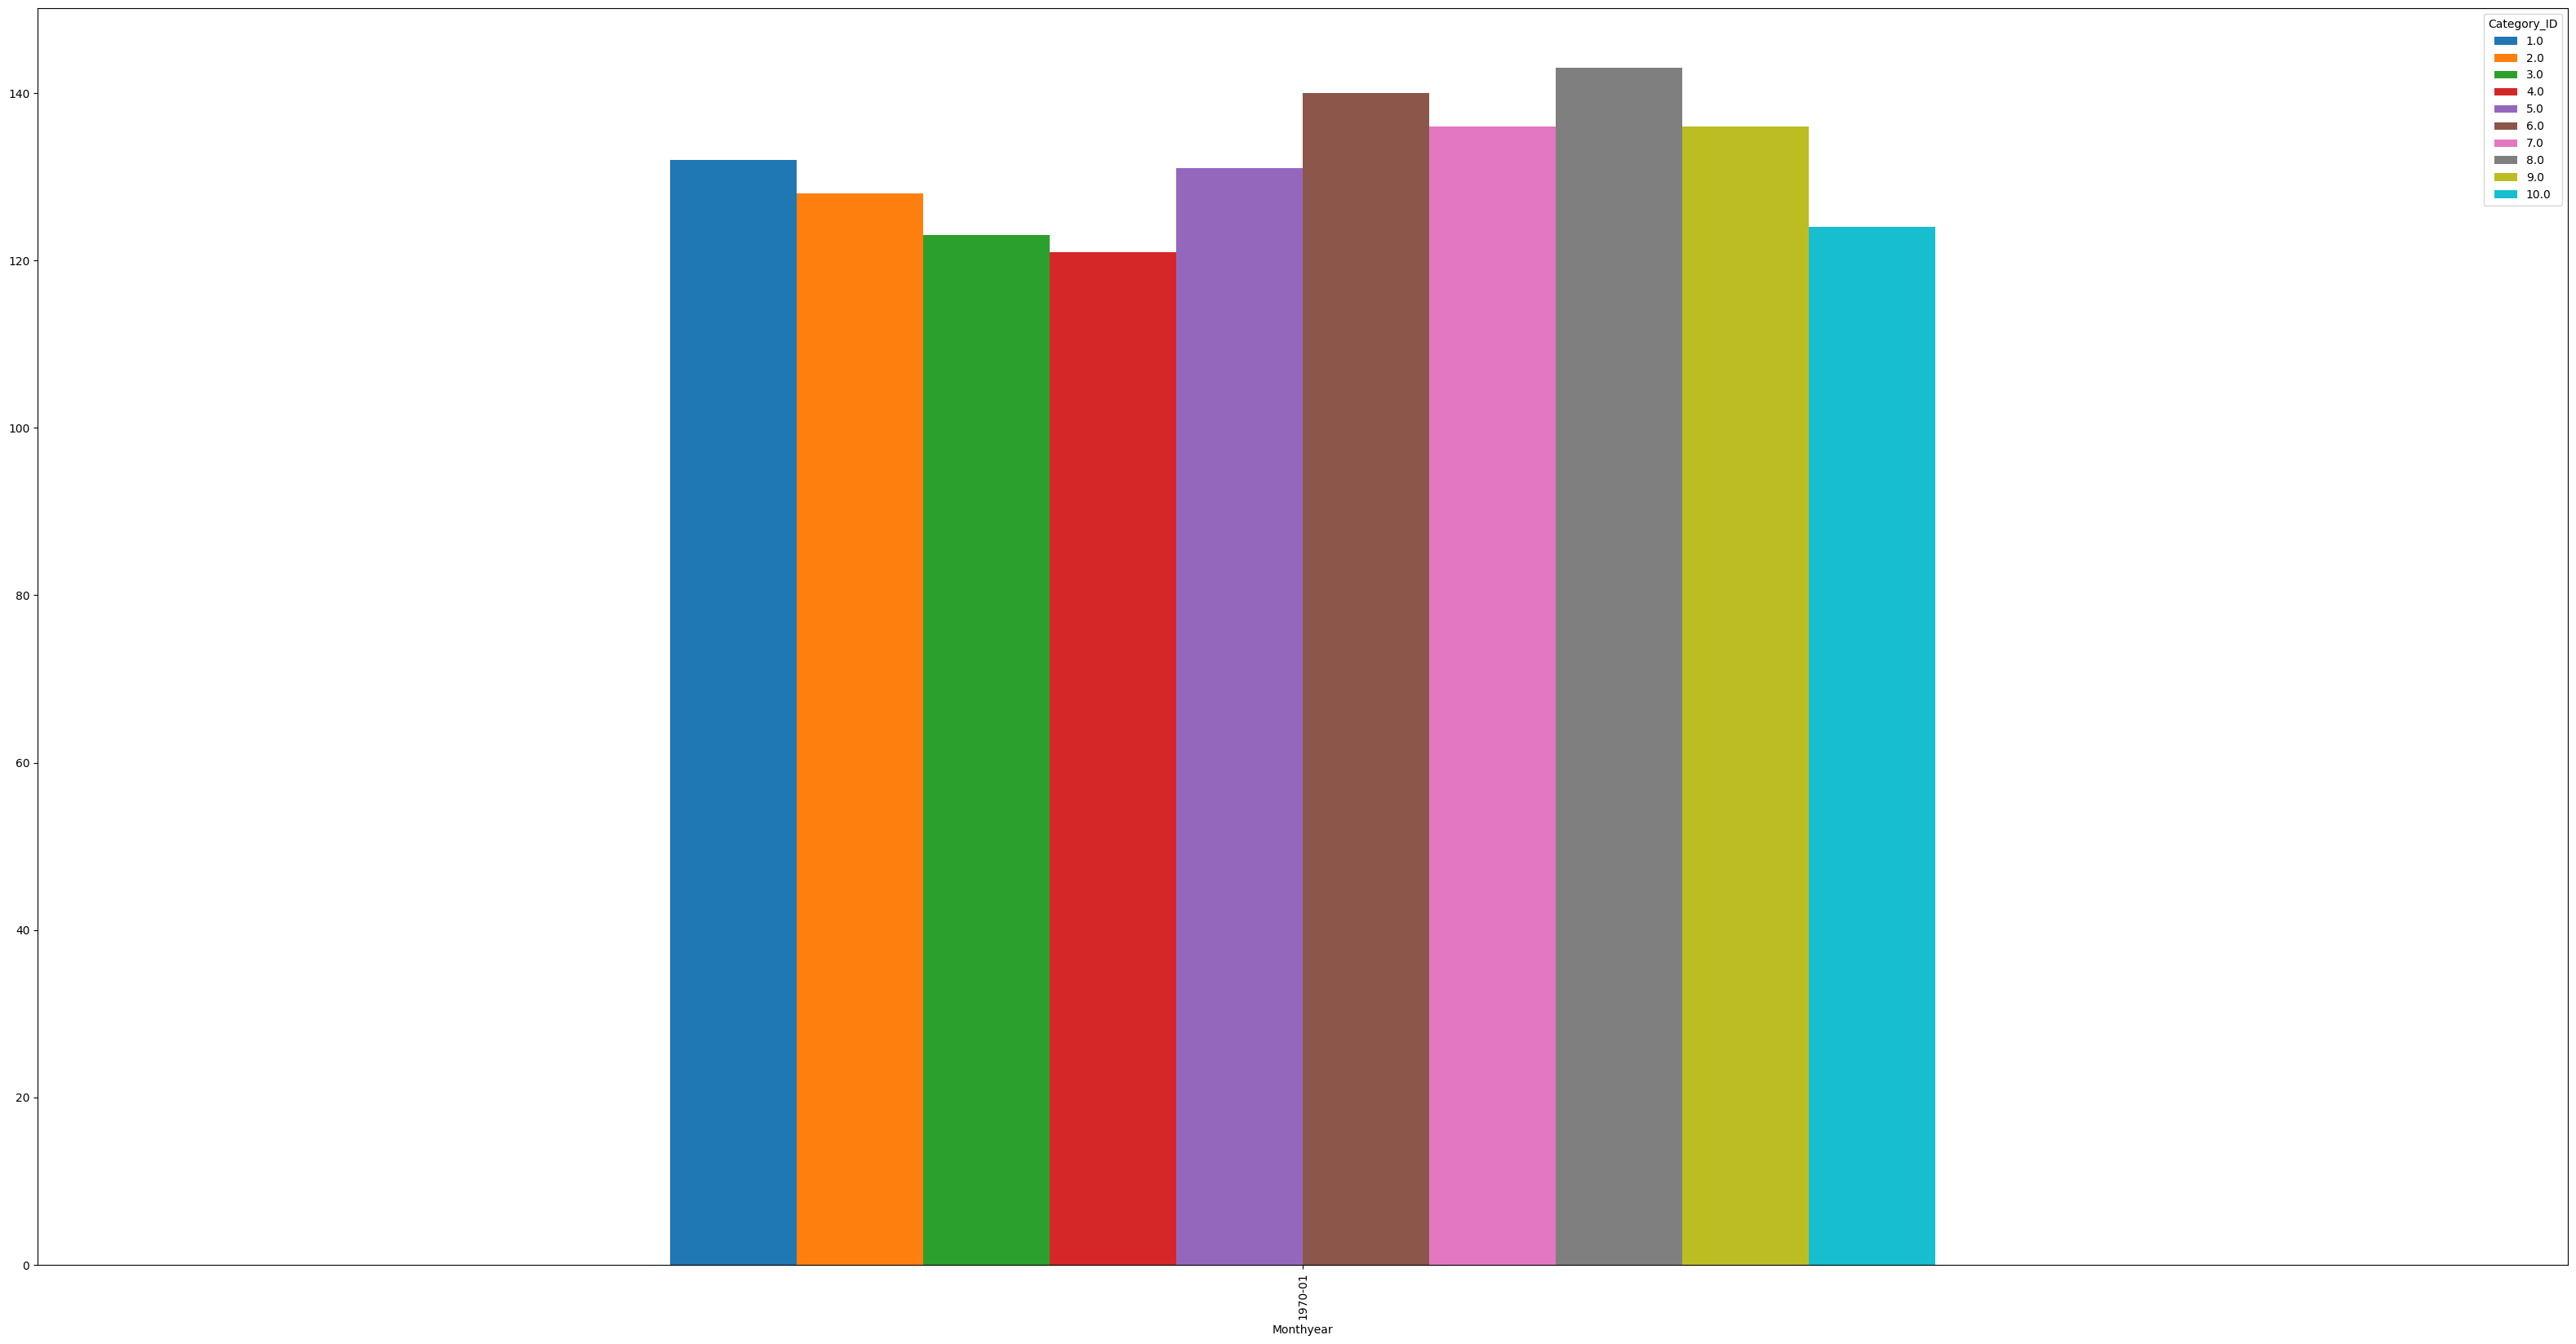

In [ ]:
df['Days_to_Deliver'] = pd.to_datetime(df['Days_to_Deliver'])
df['Days_to_Deliver'] = pd.to_datetime(df['Days_to_Deliver'], format='%d-%m-%Y')
df['Monthyear'] = df['Days_to_Deliver'].dt.strftime('%Y-%m')
plt.figure(figsize=(40,20))
devicetypecount = df.groupby(['Monthyear', 'Category_ID']).size().unstack()
devicetypecount.plot(kind='bar', figsize=(40,20))

# 3) return rate by time in date

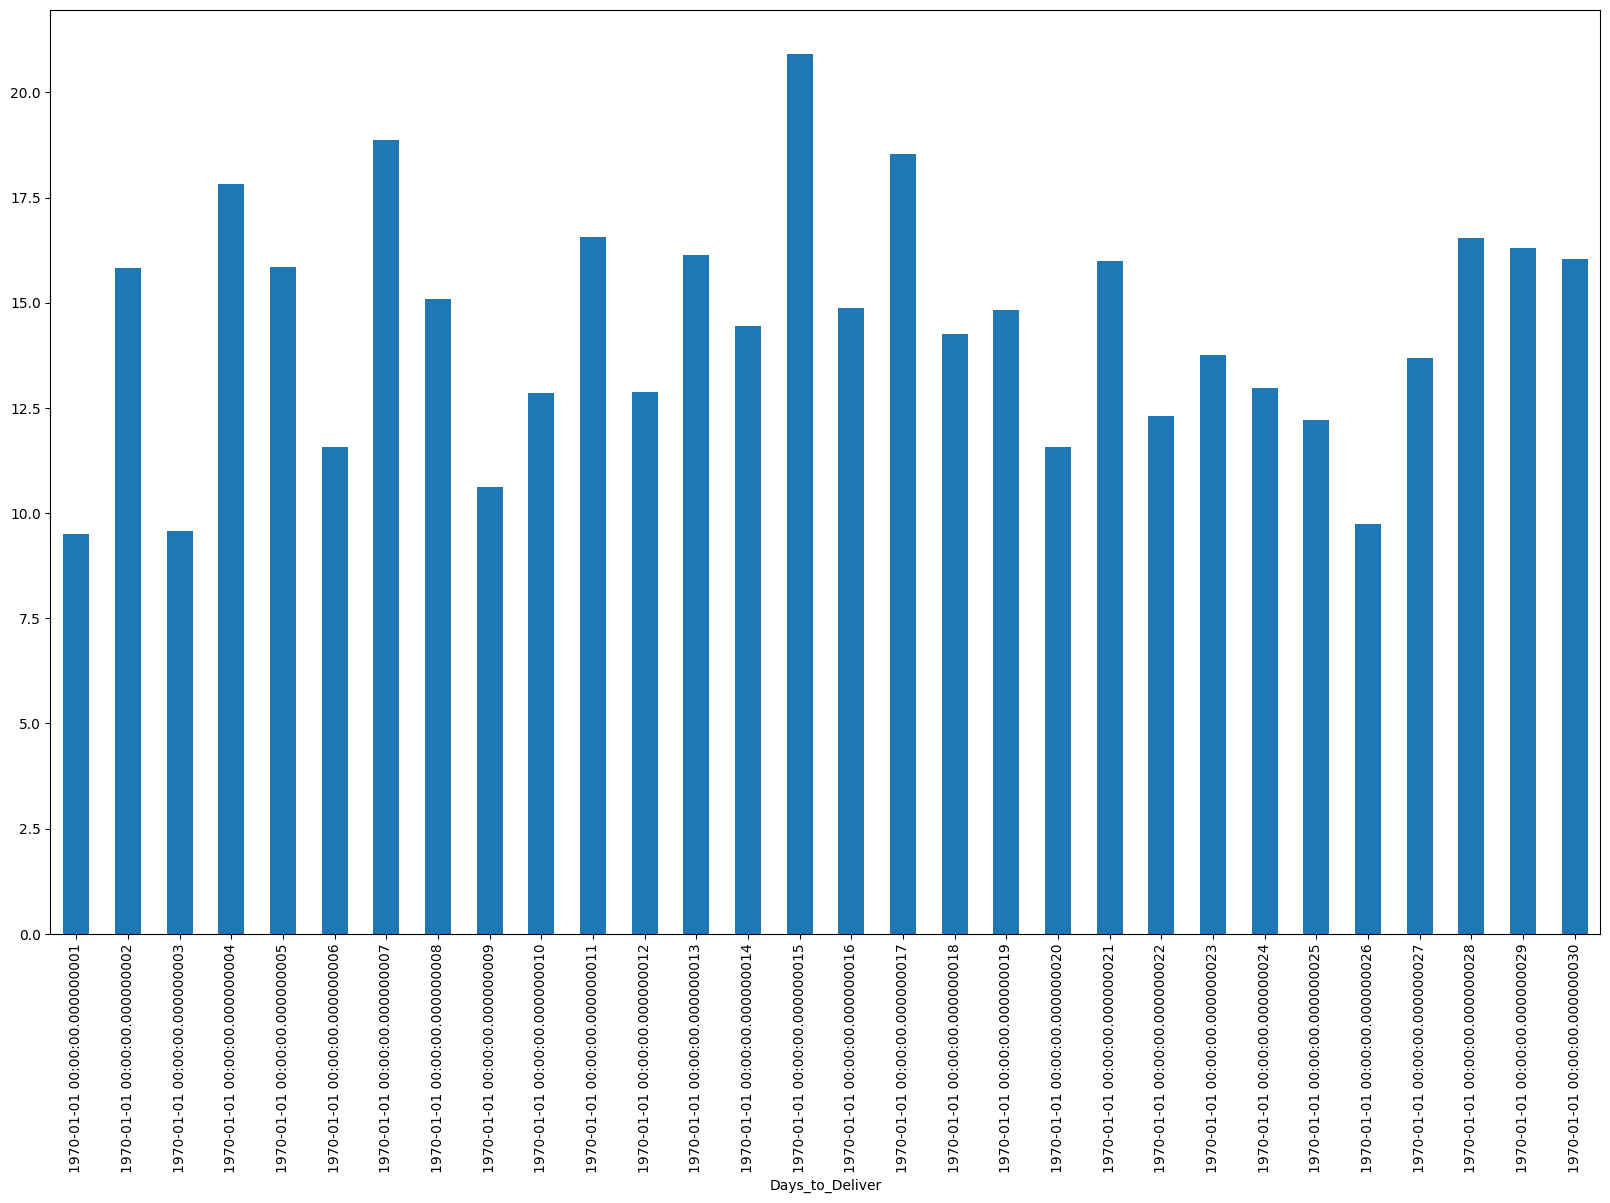

In [ ]:
# bar chart
result2 = df.groupby('Days_to_Deliver')['Return_Rate'].sum()
result2.plot(kind='bar', figsize=(20,12))
plt.show()

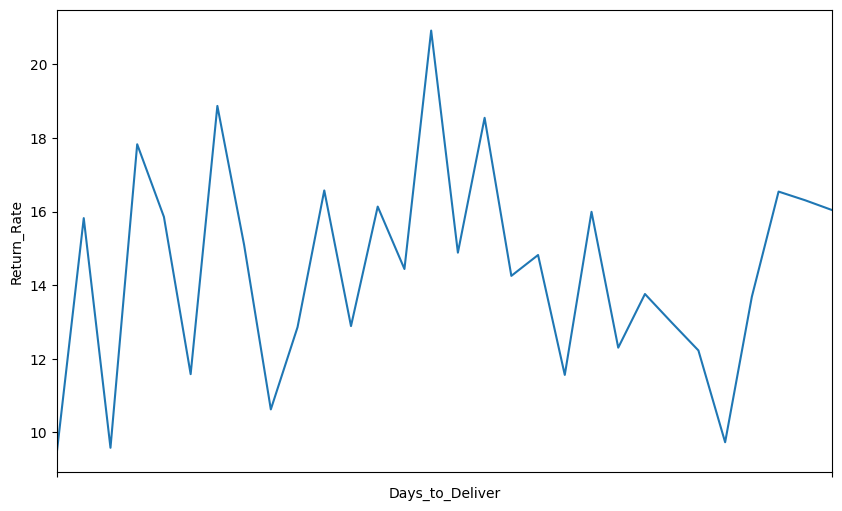

In [ ]:
# try line chart
result2.plot(kind='line', figsize=(10,6))
plt.xlabel('Days_to_Deliver')
plt.ylabel('Return_Rate')
plt.show()

<Axes: xlabel='Days_to_Deliver', ylabel='Return_Rate'>

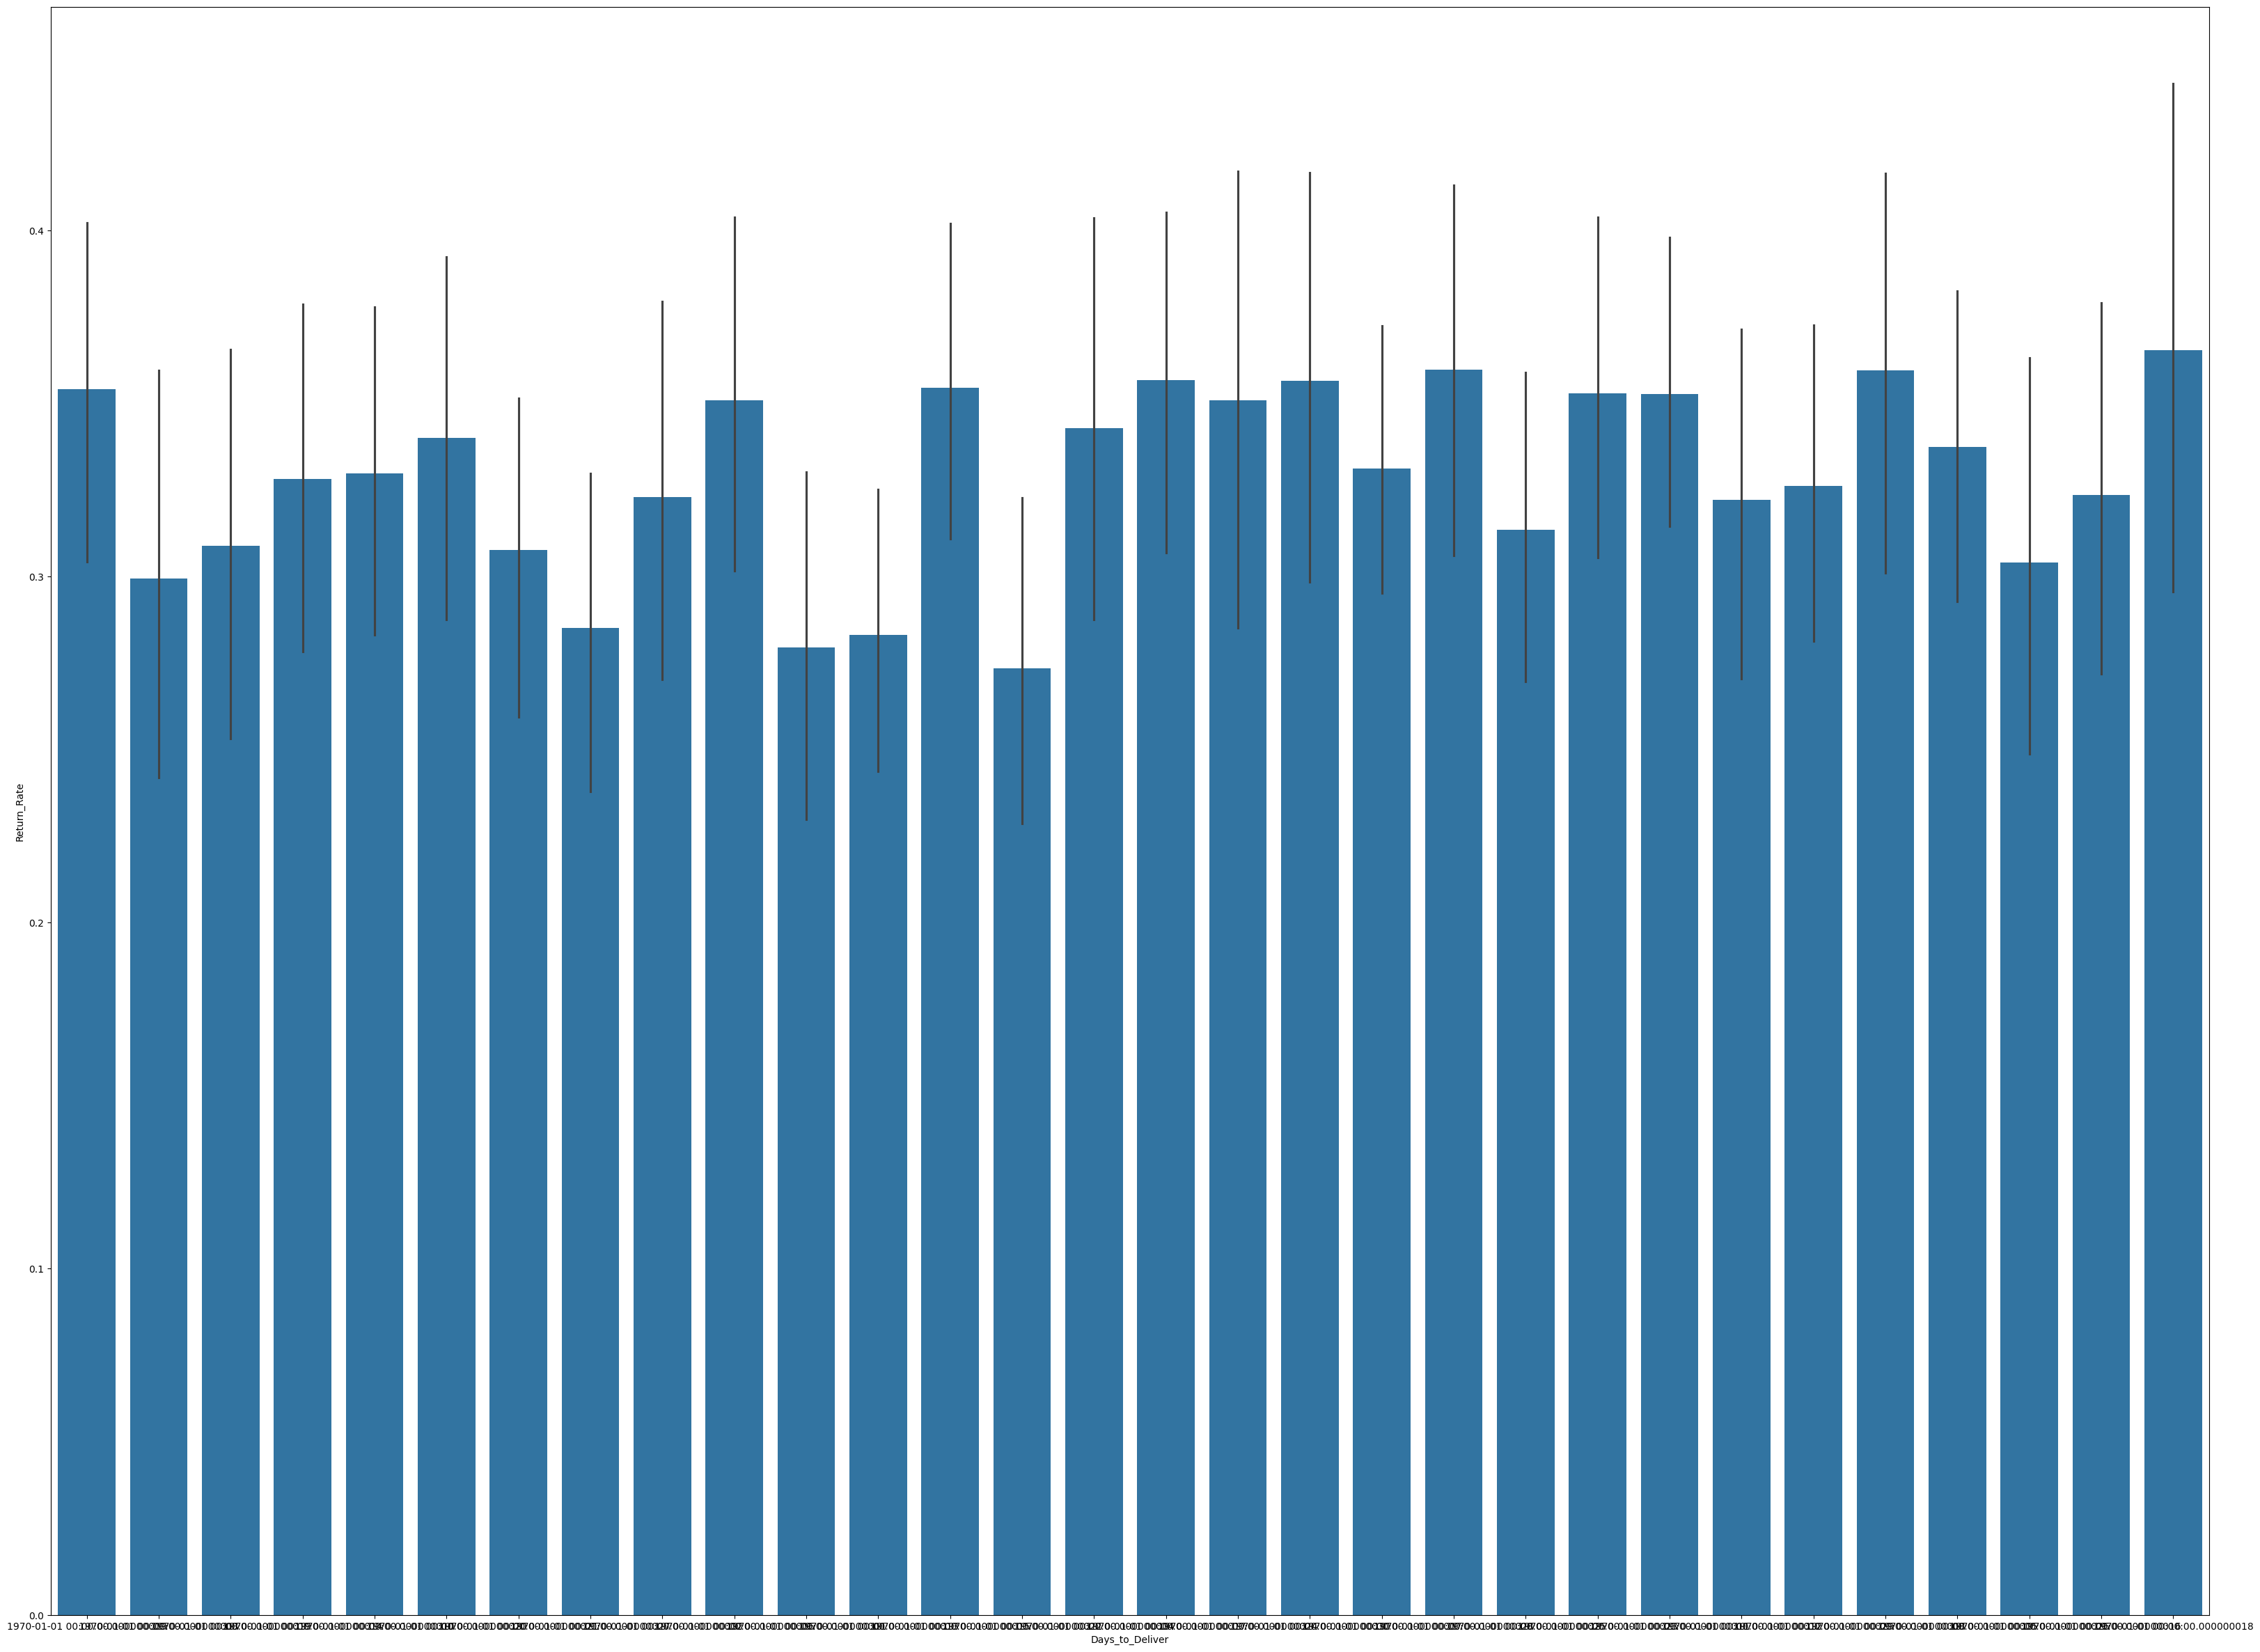

In [ ]:
# try bar plot

plt.figure(figsize=(40,30))
sns.barplot(x='Days_to_Deliver', y='Return_Rate', data=df)

# 4) Product price by cateogry

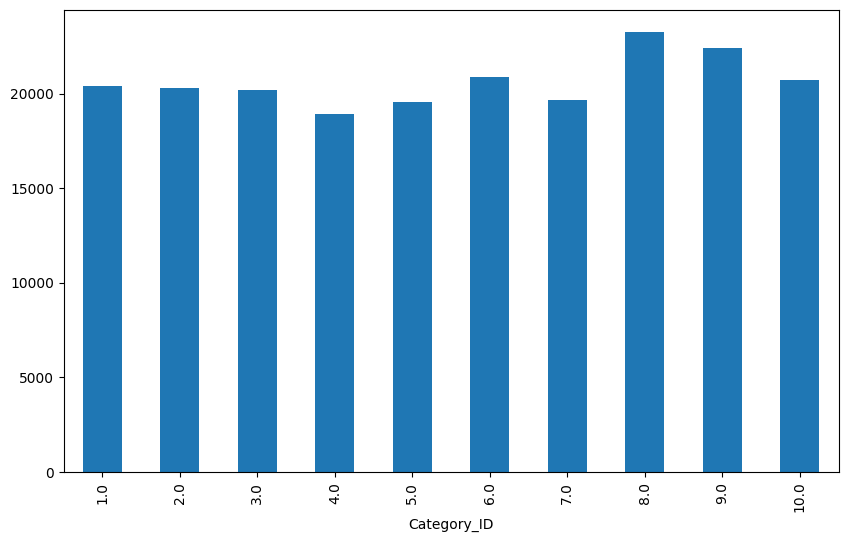

In [ ]:
result = df.groupby('Category_ID')['Product_Price'].sum()
result.plot(kind='bar', figsize=(10,6))
plt.show()

# 6) correlation between return rate and discount rate

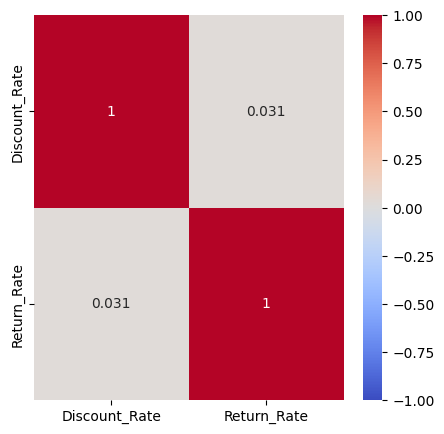

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(
    df[['Discount_Rate', 'Return_Rate']].corr(),
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1
)
plt.show()

Dataset Reference:
Yildiz. E, (2025), E-Commerce Product Performance Dataset, Kaggle, Available at: https://www.kaggle.com/datasets/efeyldz/e-commerce-product-performance-dataset, (Accessed: 19/05/2025)